In [1]:
# initial setup
%run "../../../common/0_notebooks_base_setup.py"


/Users/csuarezgurruchaga/Desktop/Digital-House/CLASE_29/dsad_2021/common
default checking
Running command `conda list`... ok
jupyterlab=2.2.6 already installed
pandas=1.1.5 already installed
bokeh=2.2.3 already installed
seaborn=0.11.0 already installed
matplotlib=3.3.2 already installed
ipywidgets=7.5.1 already installed
pytest=6.2.1 already installed
chardet=4.0.0 already installed
psutil=5.7.2 already installed
scipy=1.5.2 already installed
statsmodels=0.12.1 already installed
scikit-learn=0.23.2 already installed
xlrd=2.0.1 already installed
Running command `conda install --yes nltk=3.5.0`... ok
Solving environment: ...working... done

# All requested packages already installed.


unidecode=1.1.1 already installed
pydotplus=2.0.2 already installed
pandas-datareader=0.9.0 already installed
flask=1.1.2 already installed


---

<img src='../../../common/logo_DH.png' align='left' width=35%/>

# Naive Bayes

## Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder 
from sklearn.preprocessing import RobustScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

## Problema

En la clase vamos a construir un clasificador que intente predecir si una persona ganará más de US$ 50.000 por año 

En esta notebook vamos a preparar los datos para ser utilizados en el entrenamiento y testing del modelo



## Dataset

https://archive.ics.uci.edu/ml/datasets/Adult

Los datos corresponden a un censo de 1994.

Los campos son

age: continuous.

workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

fnlwgt: continuous.

education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

education-num: continuous.

marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-

op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

sex: Female, Male.

capital-gain: continuous.

capital-loss: continuous.

hours-per-week: continuous.

native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, 
Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.


In [3]:
data_location = '../Data/adult.data'

data = pd.read_csv(data_location, header=None, sep=',')

columns_names = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship',
             'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']

data.columns = columns_names

data.head(3)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


Vemos si tiene registros con campos nulos:

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


## Ejercicio 1 - Limpieza

¿Cuáles son las variables categoricas, y cuáles las numéricas?

Eliminemos en el dataset los espacios que rodean las variables categóricas usando el método `Series.str.strip`

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.strip.html

age - variable continua             
workclass - Variable categorica      
fnlwgt - Variable Continua          
education - Variable categorica      
education_num - Variable continua   
marital_status - variable categorica 
occupation - variable categorica     
relationship - variable categorica   
race - variable categorica           
sex - variable categorica            
capital_gain - variable continua   
capital_loss - variable continua 

hours_per_week - variable continua

native_country - variable categorica 

income - variable continua          

In [5]:
data = data.applymap(lambda x: x.strip() if type(x) is str else x)

data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Ejercicio 2 - Limpieza (cont.)

Los valores faltantes en este dataset aparecen codificados como '?'

Reemplacemos los '?' por NaN donde corresponda. Para ello usemos el método `replace`

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html

¿Qué columnas deldataset quedaron con nulos después de este reemplazo?

In [6]:
data.sample(5)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
2452,20,Private,171398,10th,6,Never-married,Sales,Not-in-family,Other,Male,0,0,40,United-States,<=50K
29178,25,Private,181772,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
9900,43,Private,295510,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
19434,67,Private,212705,Masters,14,Married-spouse-absent,Exec-managerial,Not-in-family,White,Male,0,0,55,United-States,>50K
9032,46,Local-gov,141058,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,65,United-States,<=50K


In [7]:
data = data.replace(to_replace='?',value=np.NaN)

In [8]:
data.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
dtype: int64

## Ejercicio 3 - Drop null

Eliminemos los registros incompletos del dataset.


In [9]:
data.dropna(inplace=True)

In [10]:
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

## Ejercicio 4 - Features, Target

Construyamos una matriz de features (X) y el vector target (y) para predecir `income` en el dataset de datos completos

¿Qué valores toma la variable `income` en el dataset?


In [11]:
data.income.value_counts()

<=50K    22654
>50K      7508
Name: income, dtype: int64

In [12]:
X = data.drop('income', axis=1)
y = data.income 

## Ejercicio 5 - Train Test Split

Constuyamos los conjuntos de train y test, asignando el 70% de los registros a train y el 30% a test

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [13]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X, y,stratify = y, train_size=0.7, random_state=1)

## Ejercicio 6 - Feature Engineering (Categóricas)

Usemos `OneHotEncoder` para transformar las variables categóricas del dataset.

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-categorical-features

El resultado de este ejercicio deben ser dos instancias de DataFrame: X_train_categorical y X_test_categorical, que tengan las variables categóricas transformadas para los datos de train y test respectivamente.

In [14]:
from sklearn.preprocessing import OneHotEncoder

In [15]:
categorical_columns = ['workclass', 'education', 'marital_status' ,'occupation' ,'relationship', 'race', 'sex', 'native_country']    


In [16]:
enc = OneHotEncoder(drop='first')
enc = enc.fit(X_train[categorical_columns])
X_train_categorical = enc.transform(X_train[categorical_columns])
X_test_categorical = enc.transform(X_test[categorical_columns])

In [17]:
enc.categories_

[array(['Federal-gov', 'Local-gov', 'Private', 'Self-emp-inc',
        'Self-emp-not-inc', 'State-gov', 'Without-pay'], dtype=object),
 array(['10th', '11th', '12th', '1st-4th', '5th-6th', '7th-8th', '9th',
        'Assoc-acdm', 'Assoc-voc', 'Bachelors', 'Doctorate', 'HS-grad',
        'Masters', 'Preschool', 'Prof-school', 'Some-college'],
       dtype=object),
 array(['Divorced', 'Married-AF-spouse', 'Married-civ-spouse',
        'Married-spouse-absent', 'Never-married', 'Separated', 'Widowed'],
       dtype=object),
 array(['Adm-clerical', 'Armed-Forces', 'Craft-repair', 'Exec-managerial',
        'Farming-fishing', 'Handlers-cleaners', 'Machine-op-inspct',
        'Other-service', 'Priv-house-serv', 'Prof-specialty',
        'Protective-serv', 'Sales', 'Tech-support', 'Transport-moving'],
       dtype=object),
 array(['Husband', 'Not-in-family', 'Other-relative', 'Own-child',
        'Unmarried', 'Wife'], dtype=object),
 array(['Amer-Indian-Eskimo', 'Asian-Pac-Islander', 'Black', '

In [18]:
X_train.shape

(21113, 14)

In [19]:
X_train_categorical.shape

(21113, 90)

In [20]:
# Me devuelve el nombre de las features
enc.get_feature_names(categorical_columns)

array(['workclass_Local-gov', 'workclass_Private',
       'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc',
       'workclass_State-gov', 'workclass_Without-pay', 'education_11th',
       'education_12th', 'education_1st-4th', 'education_5th-6th',
       'education_7th-8th', 'education_9th', 'education_Assoc-acdm',
       'education_Assoc-voc', 'education_Bachelors',
       'education_Doctorate', 'education_HS-grad', 'education_Masters',
       'education_Preschool', 'education_Prof-school',
       'education_Some-college', 'marital_status_Married-AF-spouse',
       'marital_status_Married-civ-spouse',
       'marital_status_Married-spouse-absent',
       'marital_status_Never-married', 'marital_status_Separated',
       'marital_status_Widowed', 'occupation_Armed-Forces',
       'occupation_Craft-repair', 'occupation_Exec-managerial',
       'occupation_Farming-fishing', 'occupation_Handlers-cleaners',
       'occupation_Machine-op-inspct', 'occupation_Other-service',
       'oc

## Ejercicio 7 -  Feature Engineering (Continuas)

Usemos `RobustScaler` para transformar las variables numéricas del dataset.

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html

https://scikit-learn.org/stable/modules/preprocessing.html

*This Scaler removes the median and scales the data according to the quantile range (defaults to IQR: Interquartile Range). The IQR is the range between the 1st quartile (25th quantile) and the 3rd quartile (75th quantile).*

El resultado de este ejercicio deben ser dos instancias de DataFrame: X_train_numerical y X_test_numerical, que tengan las variables numéricas transformadas para los datos de train y test respectivamente.


In [21]:
from sklearn.preprocessing import RobustScaler

In [22]:
columnas_continuas = [col for col in data.columns if data[col].dtypes != 'object']

enc_numerico = RobustScaler()
enc_numerico = enc_numerico.fit(X_train[columnas_continuas])

X_train_numerical = enc_numerico.transform(X_train[columnas_continuas])
X_test_numerical = enc_numerico.transform(X_test[columnas_continuas])

## Ejercicio 8 - Combinación de los datos transformados

Combinemos los datos de train conformados por X_train_categorical, X_train_numerical, Y_train en una instancia de DataFrame, y guardemos ese DataFrame en el archivo **adult_train.csv** con campos separados por tab.

Lo mismo para los datos de test, conformados por X_test_categorical, X_test_numerical, Y_test en el archivo **adult_test.csv**

Ayuda: usar shape para ver las dimensiones de los datasets a combinar y las dimensiones de los resultados.

In [23]:
X_train_numerical=pd.DataFrame(X_train_numerical)
X_train_categorical=pd.DataFrame(X_train_categorical.toarray(), columns = enc.get_feature_names(categorical_columns))

X_test_numerical=pd.DataFrame(X_test_numerical)
X_test_categorical=pd.DataFrame(X_test_categorical.toarray(),columns = enc.get_feature_names(categorical_columns))

In [24]:
y_train_concatenar =y_train.reset_index()
y_test_concatenar = y_test.reset_index()

In [25]:
X_train_encoded = pd.concat([X_train_numerical, X_train_categorical,y_train_concatenar], axis=1)
X_test_encoded = pd.concat([X_test_numerical, X_test_categorical,y_test_concatenar], axis=1)

In [26]:
X_train_encoded.head()

,0,1,2,3,4,5,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia,index,income
0,-0.052632,0.026842,-0.75,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,21858,<=50K
1,0.421053,0.094754,-0.25,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,16736,<=50K
2,-0.631579,0.228440,-0.25,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,18855,<=50K
3,0.526316,0.159573,0.00,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,8323,<=50K
4,1.000000,0.437779,0.75,0.0,0.0,-2.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4691,<=50K


In [27]:
X_test_categorical.index

RangeIndex(start=0, stop=9049, step=1)

In [28]:
X_test_numerical.index

RangeIndex(start=0, stop=9049, step=1)

In [29]:
X_train_categorical.index

RangeIndex(start=0, stop=21113, step=1)

In [30]:
X_train_numerical.index

RangeIndex(start=0, stop=21113, step=1)

In [31]:
y_train.index

Int64Index([21858, 16736, 18855,  8323,  4691, 22847, 15425, 22192, 21337,
            19744,
            ...
             8567, 14793, 31418, 12807, 18427,  1242, 10077, 13572,  7896,
             6495],
           dtype='int64', length=21113)

In [32]:
X_train_encoded.to_csv('X_train.csv',sep='\t', index= False)
X_test_encoded.to_csv('X_test.csv',sep='\t', index=False) 

In [33]:
from sklearn.naive_bayes import GaussianNB

In [34]:
gnb = GaussianNB()
gnb.fit(X_train_encoded.drop('income', axis=1),y_train)

GaussianNB()

In [35]:
predict=gnb.predict(X_test_encoded.drop('income', axis=1))
predict

array(['<=50K', '<=50K', '<=50K', ..., '<=50K', '>50K', '<=50K'],
      dtype='<U5')

In [36]:
from sklearn.metrics import accuracy_score

round(accuracy_score(y_test, predict), 2)

0.83

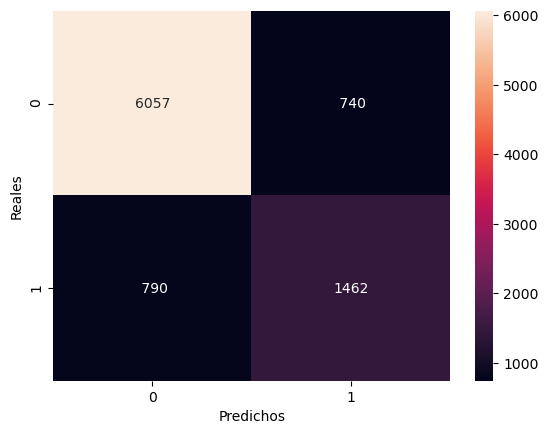

In [40]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

sns.heatmap(confusion_matrix(y_test,predict), annot=True, fmt='4d')
plt.xlabel('Predichos')
plt.ylabel('Reales')
plt.show()